In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [5]:
df = pd.read_csv('datasets/train_burnout.csv')
df.shape

(22750, 9)

##### Feature Organization

In [6]:
target = "Burn Rate"
features = list(set(df.columns) - set([target]))
numerical = df[features].select_dtypes(include=np.number).columns.tolist()
categorical = [col for col in features if col not in numerical]

print(f"Target feature:\n {target}\n")
print(f"Numerical features:\n{numerical}\n")
print("Categorical features:\n", categorical)

Target feature:
 Burn Rate

Numerical features:
['Designation', 'Mental Fatigue Score', 'Resource Allocation']

Categorical features:
 ['Date of Joining', 'Employee ID', 'WFH Setup Available', 'Gender', 'Company Type']


## Distributions

##### Numerical

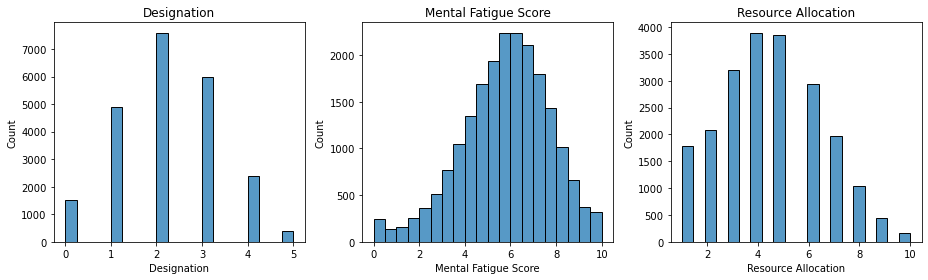

In [7]:
rows = 1
cols = 3
fig = plt.figure(figsize=(13, 4))
for i, col in enumerate(numerical):
    plt.subplot(rows, cols, i+1)
    sns.histplot(x=col, bins=20, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()   

##### Categorical

In [8]:
df[categorical].nunique()

Date of Joining          366
Employee ID            22750
WFH Setup Available        2
Gender                     2
Company Type               2
dtype: int64

In [9]:
plotable_categorical = [col for col in categorical if df[categorical][col].nunique() < 10]
print(f"Plotable Categorical features:\n {plotable_categorical}\n")

Plotable Categorical features:
 ['WFH Setup Available', 'Gender', 'Company Type']



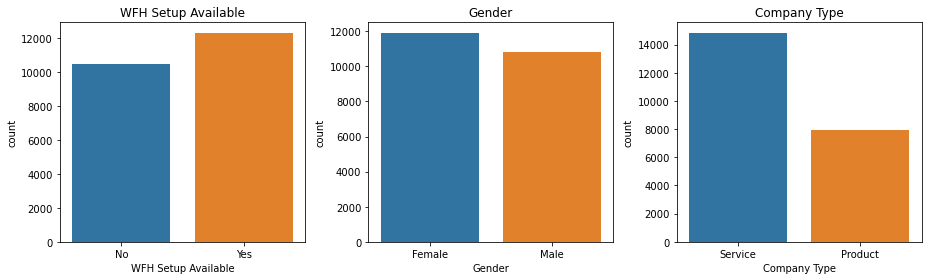

In [10]:
rows = 1
cols = 3
fig = plt.figure(figsize=(13, 4))
for i, col in enumerate(plotable_categorical):
    plt.subplot(rows, cols, i+1)
    sns.countplot(x=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show() 

## Relations between features

##### Numerical vs Numerical

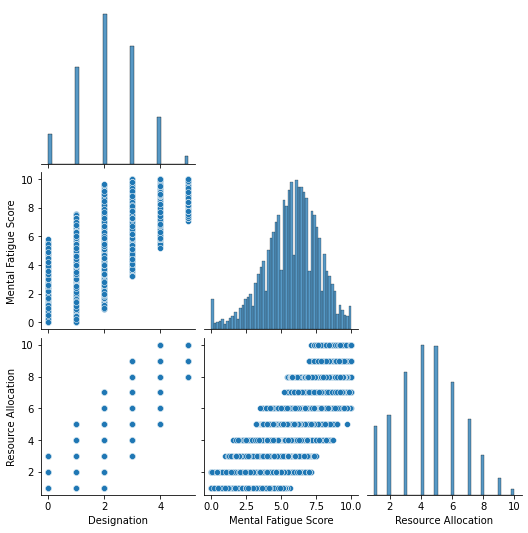

In [11]:
sns.pairplot(df[numerical], height=2.5, corner=True);

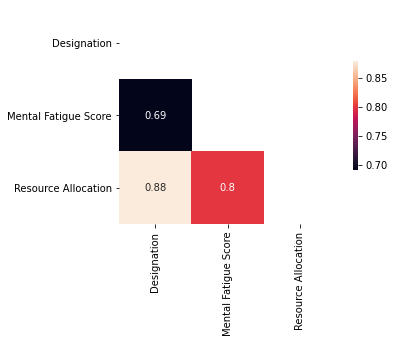

In [12]:
corr = df[numerical].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, annot=True, square=True, cbar_kws={"shrink": .5});

##### Numerical vs Target

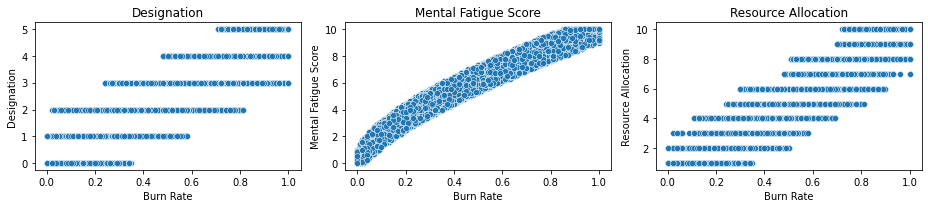

In [13]:
rows = 1
cols = 3
fig = plt.figure(figsize=(13, 3))
for i, col in enumerate(numerical):
    plt.subplot(rows, cols, i+1)
    sns.scatterplot(x=target, y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

# Preprocessing

##### NA removal

In [14]:
df.isna().sum() / df.shape[0]

Employee ID             0.000000
Date of Joining         0.000000
Gender                  0.000000
Company Type            0.000000
WFH Setup Available     0.000000
Designation             0.000000
Resource Allocation     0.060703
Mental Fatigue Score    0.093055
Burn Rate               0.049407
dtype: float64

In [15]:
df.shape

(22750, 9)

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(18590, 9)

##### Splitting

In [18]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14872, 8), (3718, 8), (14872,), (3718,))

## Feature preprocessing

##### Train Set

In [19]:
from datetime import datetime

In [20]:
X_train["Years in Company"] = datetime.now().year - pd.DatetimeIndex(X_train["Date of Joining"]).year 

<ipython-input-20-5d7084c4c2fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Years in Company"] = datetime.now().year - pd.DatetimeIndex(X_train["Date of Joining"]).year


In [21]:
X_train = X_train.drop(columns=["Employee ID", "Date of Joining"])
X_train.head()

,Designation,WFH Setup Available,Mental Fatigue Score,Gender,Company Type,Resource Allocation,Years in Company
19000,2,Yes,8.8,Male,Product,6.0,13
19405,3,No,7.1,Male,Service,7.0,13
9965,2,No,6.0,Female,Product,3.0,13
613,3,No,4.9,Female,Product,6.0,13
3475,0,No,0.6,Male,Product,1.0,13


In [22]:
X_train = pd.get_dummies(X_train, columns=['Gender', 'Company Type', 'WFH Setup Available'], drop_first=True)
X_train.head()

,Designation,Mental Fatigue Score,Resource Allocation,Years in Company,Gender_Male,Company Type_Service,WFH Setup Available_Yes
19000,2,8.8,6.0,13,1,0,1
19405,3,7.1,7.0,13,1,1,0
9965,2,6.0,3.0,13,0,0,0
613,3,4.9,6.0,13,0,0,0
3475,0,0.6,1.0,13,1,0,0


In [23]:
X_train.describe()

,Designation,Mental Fatigue Score,Resource Allocation,Years in Company,Gender_Male,Company Type_Service,WFH Setup Available_Yes
count,14872.000000,14872.000000,14872.000000,14872.0,14872.000000,14872.000000,14872.000000
mean,2.179263,5.726668,4.486148,13.0,0.476062,0.654250,0.540075
std,1.134078,1.923612,2.046352,0.0,0.499443,0.475628,0.498408
min,0.000000,0.000000,1.000000,13.0,0.000000,0.000000,0.000000
25%,1.000000,4.600000,3.000000,13.0,0.000000,0.000000,0.000000
50%,2.000000,5.900000,4.000000,13.0,0.000000,1.000000,1.000000
75%,3.000000,7.100000,6.000000,13.0,1.000000,1.000000,1.000000
max,5.000000,10.000000,10.000000,13.0,1.000000,1.000000,1.000000


In [24]:
X_train = X_train.drop(columns=["Years in Company"])
X_train.head()

,Designation,Mental Fatigue Score,Resource Allocation,Gender_Male,Company Type_Service,WFH Setup Available_Yes
19000,2,8.8,6.0,1,0,1
19405,3,7.1,7.0,1,1,0
9965,2,6.0,3.0,0,0,0
613,3,4.9,6.0,0,0,0
3475,0,0.6,1.0,1,0,0


##### Test Set

In [25]:
X_test["Years in Company"] = datetime.now().year - pd.DatetimeIndex(X_test["Date of Joining"]).year 

<ipython-input-25-f98bf03a22ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Years in Company"] = datetime.now().year - pd.DatetimeIndex(X_test["Date of Joining"]).year


In [26]:
X_test = X_test.drop(columns=["Employee ID", "Date of Joining"])

In [27]:
X_test = pd.get_dummies(X_test, columns=['Gender', 'Company Type', 'WFH Setup Available'], drop_first=True)

In [28]:
X_test = X_test.drop(columns=["Years in Company"])

In [29]:
X_test.head()

,Designation,Mental Fatigue Score,Resource Allocation,Gender_Male,Company Type_Service,WFH Setup Available_Yes
8815,1,3.9,2.0,1,1,1
10896,2,5.2,4.0,1,1,1
16049,3,4.6,4.0,1,1,0
1746,2,6.8,4.0,0,1,1
5473,4,7.8,9.0,1,1,1


In [30]:
X_train.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True])

## Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)

MinMaxScaler()

In [33]:
X_train_norm = mm_scaler.transform(X_train)

In [34]:
X_train_norm = pd.DataFrame(X_train_norm)
X_train_norm.describe().loc[['min', 'max', 'mean', 'std'], :]

,0,1,2,3,4,5
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.435853,0.572667,0.387350,0.476062,0.654250,0.540075
std,0.226816,0.192361,0.227372,0.499443,0.475628,0.498408


In [35]:
X_train_norm.columns = X_train.columns

In [36]:
X_train_norm.describe().loc[['min', 'max', 'mean', 'std'], :]

,Designation,Mental Fatigue Score,Resource Allocation,Gender_Male,Company Type_Service,WFH Setup Available_Yes
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.435853,0.572667,0.387350,0.476062,0.654250,0.540075
std,0.226816,0.192361,0.227372,0.499443,0.475628,0.498408


##### Test Set

In [37]:
mm_scaler.fit(X_test)

MinMaxScaler()

In [38]:
X_test_norm = mm_scaler.transform(X_test)

In [39]:
X_test_norm = pd.DataFrame(X_test_norm)
X_test_norm.describe().loc[['min', 'max', 'mean', 'std'], :]

,0,1,2,3,4,5
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
mean,0.435987,0.575420,0.387574,0.47418,0.657343,0.537386
std,0.225914,0.190834,0.226566,0.49940,0.474662,0.498667


In [40]:
X_test_norm.columns = X_test.columns

In [41]:
X_test_norm.describe().loc[['min', 'max', 'mean', 'std'], :]

,Designation,Mental Fatigue Score,Resource Allocation,Gender_Male,Company Type_Service,WFH Setup Available_Yes
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
mean,0.435987,0.575420,0.387574,0.47418,0.657343,0.537386
std,0.225914,0.190834,0.226566,0.49940,0.474662,0.498667


# Fitting to Model

In [42]:
from sklearn import metrics

In [43]:
def evaluate_reg_set(reg, X, y):
    y_pred = reg.predict(X)    
    RMSE = metrics.mean_squared_error(y, y_pred, squared=False)
    r2 = metrics.r2_score(y, y_pred)
    return RMSE, r2

In [44]:
def evaluate_reg_model(reg, X_train, y_train, X_test, y_test):
    RMSE_train, r2_train = evaluate_reg_set(reg, X_train, y_train)
    RMSE_test, r2_test = evaluate_reg_set(reg, X_test, y_test)
    
    print(f"Regression Model: {reg}\n")
    print("Train Metrics:")
    print(f"RMSE: {RMSE_train}")
    print(f"R2: {r2_train}\n")
    print("Test Metrics:")
    print(f"RMSE: {RMSE_test}")
    print(f"R2: {r2_test}")

##### Linear Regression

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_norm, y_train)

LinearRegression()

In [149]:
evaluate_reg_model(linear_reg, X_train_norm, y_train, X_test_norm, y_test)

Regression Model: LinearRegression()

Train Metrics:
RMSE: 0.055819989005978135
R2: 0.920765848922243

Test Metrics:
RMSE: 0.055352126446872936
R2: 0.9202219777928837


In [150]:
y_pred = linear_reg.predict(X_test)

In [161]:
error_df = np.concatenate([y_pred,y_test.values])

In [163]:
error_df.shape

(7436,)

###### Saving the model

In [48]:
# import pickle

In [49]:
# MODEL_FILENAME = 'stress_model.pkl'

In [50]:
# with open(MODEL_FILENAME, 'wb') as file:
#     pickle.dump(linear_reg, file)

##### Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
evaluate_reg_model(forest_reg, X_train, y_train, X_test, y_test)

Regression Model: RandomForestRegressor()

Train Metrics:
RMSE: 0.04363464272871264
R2: 0.9515832354006379

Test Metrics:
RMSE: 0.058016549259511434
R2: 0.9123567580087322


# Data Modeling 2

In [237]:
df_2 = X_train.copy()
df_2['Burnout Rate'] = y_train
df_2['Mental Fatigue Score'] = df_2['Mental Fatigue Score'].round(0).astype(int)

**NEW QUESTIONS**

Did you experience difficulties concentrating during work? 
⇒ Integer between 0 and 5

How often do you experience headaches?
⇒ Integer between 0 and 5

How often do you experience trouble falling asleep or staying asleep ?
⇒ Integer between 0 and 5

Have you experienced any change in your appetite?
⇒ Integer between 0 and 5

Have you experienced unexpected weight gain or weight loss?
⇒ Yes/No

Have you felt apathetic about activities that usually bring you joy?
⇒ Yes/No

Have you experienced a lack of motivation either professionally or personnally ?
⇒ Integer between 0 and 5


In [238]:
df_2.shape

(14872, 7)

In [239]:
# Generating the data for new questions
random_data_0 = np.random.randint(0,6,size=(df_2.shape[0]*100, 5))
random_data_1 = np.random.randint(0, 2, size=(df_2.shape[0]*100, 2))
random_data = np.concatenate([random_data_0,random_data_1], axis=1)

columns = ['concentration_score', 'headache_score', 'sleep_score',
            'appetite_score','motivation_score','weight_score', 
             'apathy_score']
df_generated = pd.DataFrame(data=random_data, columns=columns)

# Option 1 - We take the mean and scale it for the score to be between 0 and 10
df_generated['total_score_normalized'] = (df_generated.sum(axis=1)*10/27).round(0).astype(int)

In [249]:
for i in range(11):
    df_mental = df_2[df_2['Mental Fatigue Score']==i]
    df_generated_mental = df_generated[df_generated['total_score_normalized']==i]

    if df_mental.shape[0] > df_generated_mental.shape[0]:
        pass
    else:
        df_generated_mental =  df_generated_mental.iloc[:df_mental.shape[0]].reset_index(drop=True)
        df_mental = df_mental.reset_index(drop=True)

    df_cache = pd.concat([df_mental, df_generated_mental], axis=1, ignore_index=True)
    df_cache.columns = list(df_mental.columns) + list(df_generated_mental.columns)
    df_cache.drop(['Mental Fatigue Score'], axis=1, inplace=True)
    if i==0:
        df_concat = df_cache
    else:
        df_concat = pd.concat([df_concat, df_cache], axis=0, ignore_index=True)


In [250]:
# New DataFrame to work on
df_concat.shape

(14872, 14)

In [246]:
df_2.shape

(14872, 7)